<h1> CLASSIFICAZIONE SU TITLETYPE CON LABEL-ENCODING</h1>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)


In [27]:
data = pd.read_csv('df_train.csv',  skipinitialspace=True)

In [28]:
df1 = data.copy()

In [29]:

# Assumiamo che il tuo dataframe si chiami 'df'
# df = pd.read_csv('tuo_file.csv')  # Se stai leggendo il file CSV

# Applichiamo One-Hot Encoding alle variabili categoriche 'genres', 'countryOfOrigin', 'titleType'

# 1. One-Hot Encoding della variabile 'genres' (attento: può essere più complesso perché è una lista di generi)
df_genres = df1['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])  # Splitta i generi in una lista
df_genres = df_genres.explode().str.get_dummies().groupby(level=0).sum()  # Crea una colonna per ogni genere

# 2. One-Hot Encoding della variabile 'countryOfOrigin'
df_country = df1['countryOfOrigin'].apply(lambda x: x[0] if isinstance(x, list) else x)  # Prende il primo paese se è una lista
df_country = pd.get_dummies(df_country, prefix='country')


# 4. Concatenare i dati trasformati con il dataframe originale
df_encoded = pd.concat([df1, df_genres, df_country], axis=1)

# Ora df_encoded contiene le variabili originali e le variabili One-Hot Encoded
# Rimuoviamo le colonne originali non necessarie (se vuoi)
df_encoded = df_encoded.drop(columns=['genres', 'countryOfOrigin'])

# Visualizza i primi 5 record del dataframe trasformato

df = df_encoded.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Columns: 755 entries, rating to country_['ZW']
dtypes: bool(712), int64(43)
memory usage: 16.5 MB


In [30]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,...,country_['XYU'],country_['YUCS'],"country_['ZA', 'AT']","country_['ZA', 'CA']","country_['ZA', 'IE', 'US', 'FR']","country_['ZA', 'LS']","country_['ZA', 'UA', 'IT']","country_['ZA', 'US']",country_['ZA'],country_['ZW']
0,8,1995,58,0,1,0,21,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,6,1982,58,0,1,0,1,0,2,0,...,False,False,False,False,False,False,False,False,False,False
2,6,1992,58,0,1,0,24,0,3,0,...,False,False,False,False,False,False,False,False,False,False
3,6,2021,58,0,22,0,56,0,4,0,...,False,False,False,False,False,False,False,False,False,False
4,8,2020,80,1,347,2,47,4,4,1,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df_trains = df.copy()

In [32]:
df_t = pd.read_csv('df_test.csv',  skipinitialspace=True)

In [33]:
df_test = df_t.copy()

In [34]:
import re

# Funzione per convertire i range in interi
def convert_range_to_integer(range_str):
    # Usa una regex per estrarre i numeri dal formato "(x, y]"
    numbers = re.findall(r"[\d.]+", range_str)
    # Il secondo numero (y) è il limite superiore, che corrisponde al valore del rating
    upper_limit = float(numbers[1])
    # Ritorna l'intero corrispondente al limite superiore
    return int(upper_limit)

# Applicare la funzione alla colonna 'rating'
df_test['rating'] = df_test['rating'].apply(convert_range_to_integer)

In [35]:
df_test['canHaveEpisodes'] = df_test['canHaveEpisodes'].astype(int)

In [36]:

# Assumiamo che il tuo dataframe si chiami 'df'
# df = pd.read_csv('tuo_file.csv')  # Se stai leggendo il file CSV

# Applichiamo One-Hot Encoding alle variabili categoriche 'genres', 'countryOfOrigin', 'titleType'

# 1. One-Hot Encoding della variabile 'genres' (attento: può essere più complesso perché è una lista di generi)
df_genres = df_test['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])  # Splitta i generi in una lista
df_genres = df_genres.explode().str.get_dummies().groupby(level=0).sum()  # Crea una colonna per ogni genere

# 2. One-Hot Encoding della variabile 'countryOfOrigin'
df_country = df_test['countryOfOrigin'].apply(lambda x: x[0] if isinstance(x, list) else x)  # Prende il primo paese se è una lista
df_country = pd.get_dummies(df_country, prefix='country')


# 4. Concatenare i dati trasformati con il dataframe originale
df_encoded = pd.concat([df_test, df_genres, df_country], axis=1)

# Ora df_encoded contiene le variabili originali e le variabili One-Hot Encoded
# Rimuoviamo le colonne originali non necessarie (se vuoi)
df_encoded = df_encoded.drop(columns=['genres', 'countryOfOrigin'])

# Visualizza i primi 5 record del dataframe trasformato

df_test = df_encoded.copy()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Columns: 369 entries, rating to country_['ZA']
dtypes: bool(326), float64(2), int64(40), object(1)
memory usage: 3.5+ MB


In [37]:
# Lista dei valori unici in 'titleType'
unique_title_types = ['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video', 'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort']

# Crea un dizionario di mappatura che assegna un numero a ciascun tipo
title_type_mapping = {title: i + 1 for i, title in enumerate(unique_title_types)}

# Sostituisci i valori di 'titleType' nel DataFrame con i numeri corrispondenti
df_test['titleType'] = df_test['titleType'].map(title_type_mapping)

# Verifica il risultato
print(df_test['titleType'].head())

0    5
1    3
2    9
3    1
4    1
Name: titleType, dtype: int64


In [77]:
# Verifica la mappatura inversa
inverse_title_type_mapping = {v: k for k, v in title_type_mapping.items()}
print(inverse_title_type_mapping)


{1: 'tvEpisode', 2: 'videoGame', 3: 'movie', 4: 'tvSeries', 5: 'video', 6: 'tvMiniSeries', 7: 'short', 8: 'tvMovie', 9: 'tvSpecial', 10: 'tvShort'}


In [38]:
no_coun_train=0
for c in df_trains.columns:
    #print(c)
    no_coun_train+=1
no_coun_test=0
for c in df_test.columns:
    #print(c)
    no_coun_test+=1
print(no_coun_test, no_coun_train)

369 755


In [39]:
df_test = df_test.reindex(columns=df_trains.columns, fill_value=0)
print("clean_train shape:", df_trains.shape)
print("clean_test shape:", df_test.shape)

clean_train shape: (16416, 755)
clean_test shape: (5460, 755)


In [40]:
df_test.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,...,country_['XYU'],country_['YUCS'],"country_['ZA', 'AT']","country_['ZA', 'CA']","country_['ZA', 'IE', 'US', 'FR']","country_['ZA', 'LS']","country_['ZA', 'UA', 'IT']","country_['ZA', 'US']",country_['ZA'],country_['ZW']
0,10,2015,21.0,0.0,7,2,11,0,5,0,...,False,False,0,0,0,0,0,0,False,0
1,5,1999,60.0,0.0,10,0,40,9,3,0,...,False,False,0,0,0,0,0,0,False,0
2,9,2023,60.0,0.0,2,0,6,0,9,0,...,False,False,0,0,0,0,0,0,False,0
3,7,2020,60.0,0.0,0,0,52,0,1,0,...,False,False,0,0,0,0,0,0,False,0
4,6,1999,90.0,0.0,2,0,44,1,1,0,...,False,False,0,0,0,0,0,0,False,0


<h1> OTTIMIZZAZIONE DEL MODELO CON VALIDATION SET</h1>

<h2>TARGET: titleType</h2>

In [41]:
from sklearn.model_selection import train_test_split

# Separiamo le caratteristiche (X) dal target (y)
X = df_trains.drop(columns=['titleType'])  # Rimuoviamo la colonna '' che è il target
y = df_trains['titleType']  # La colonna target è ''

# Dividiamo il dataset in train (80%) e validation (20%)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(13132, 754) (3284, 754) (13132,) (3284,)


In [43]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_validation_norm = norm.transform(X_validation)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [46]:
# predict: Predict the class labels for the provided data.
y_validation_pred = clf.predict(X_validation_norm)
y_validation_pred

array([1, 1, 1, ..., 1, 1, 7])

In [47]:
print(classification_report(y_validation, y_validation_pred))

              precision    recall  f1-score   support

           1       0.75      0.90      0.82       937
           2       0.41      0.47      0.44        51
           3       0.77      0.80      0.78      1096
           4       0.87      0.75      0.81       276
           5       0.53      0.44      0.48       167
           6       0.58      0.15      0.23        48
           7       0.90      0.82      0.86       509
           8       0.39      0.21      0.27       161
           9       0.43      0.18      0.26        33
          10       0.50      0.17      0.25         6

    accuracy                           0.76      3284
   macro avg       0.61      0.49      0.52      3284
weighted avg       0.75      0.76      0.75      3284



In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Definisci la griglia di ricerca per il modello
param_dist = {
    "n_neighbors": np.arange(1, 201),  # Range per i vicini
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

# Impostiamo il RandomizedSearchCV
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Numero di combinazioni da esplorare
    cv=3,  # Numero di fold
    n_jobs=-1,
    refit=True,
    random_state=0
)

# Fit del modello
random_search.fit(X_train_norm, y_train)

# Usa il miglior modello trovato
clf = random_search.best_estimator_

# Stampa i migliori parametri e la performance del miglior modello
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'weights': 'distance', 'n_neighbors': 24, 'metric': 'cityblock'}
Best Score: 0.7563211200038241


In [49]:
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=24, weights='distance')

In [50]:
# predict: Predict the class labels for the provided data.
y_validation_pred = clf.predict(X_validation_norm)
y_validation_pred

array([1, 1, 5, ..., 1, 1, 7])

In [51]:
print(classification_report(y_validation, y_validation_pred))

              precision    recall  f1-score   support

           1       0.74      0.92      0.82       937
           2       0.58      0.43      0.49        51
           3       0.78      0.83      0.80      1096
           4       0.88      0.67      0.76       276
           5       0.67      0.49      0.57       167
           6       0.50      0.06      0.11        48
           7       0.91      0.85      0.88       509
           8       0.40      0.22      0.28       161
           9       0.57      0.24      0.34        33
          10       0.00      0.00      0.00         6

    accuracy                           0.77      3284
   macro avg       0.60      0.47      0.51      3284
weighted avg       0.76      0.77      0.76      3284



In [52]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_validation, y_rh_train, y_rh_validation = train_test_split(X, y, test_size=0.4, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_validation_norm = norm.transform(X_rh_validation)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_validation_norm, y_rh_validation)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.2524744936805239


In [53]:
from sklearn.model_selection import cross_val_score
k = 4

In [54]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.75936643, 0.74413646, 0.74870545, 0.73895827])

In [55]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.2522083460249771


In [56]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.51320783, 0.49844506, 0.50930842, 0.44007449])

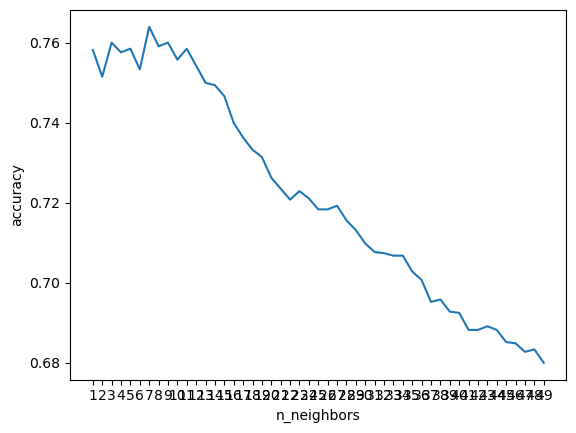

In [57]:
n_neighbors = range(1,50)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_validation_norm, y_validation))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

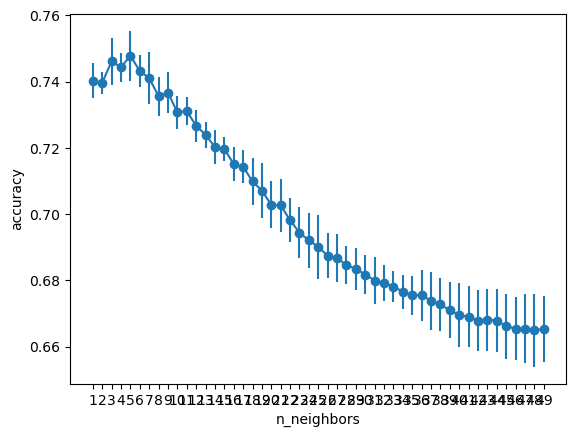

In [58]:
n_neighbors = range(1,50)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

<h1>VALUTAZIONE MODELLO SU TEST SET</h1>

In [59]:
target = 'titleType'  # Definisci il target
attributes = [col for col in df_trains.columns if col != target]  # Ottieni tutte le colonne tranne 'rating'

# Per il training set
X_train = df_trains[attributes]  # Caratteristiche per il training
y_train = df_trains[target]  # Target per il training

# Per il test set
X_test = df_test[attributes]  # Caratteristiche per il test
y_test = df_test[target]  # Target per il test


In [60]:
#Normalizzazione 
from sklearn.preprocessing import StandardScaler

# Inizializziamo lo StandardScaler
norm = StandardScaler()

# Fit e Transform sui dati di allenamento (X_train)
X_train_norm = norm.fit_transform(X_train)

# Solo Transform sui dati di test (X_test)
X_test_norm = norm.transform(X_test)


In [78]:
#PARAMETRI DI RANDOM SEARCH
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=24, weights='distance')

In [79]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([5, 3, 1, ..., 3, 4, 6])

In [80]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.92      0.83      1599
           2       0.67      0.55      0.60        94
           3       0.80      0.84      0.82      1870
           4       0.86      0.68      0.76       437
           5       0.59      0.44      0.51       250
           6       0.42      0.06      0.11        80
           7       0.90      0.89      0.90       766
           8       0.41      0.20      0.27       299
           9       0.43      0.27      0.33        49
          10       1.00      0.06      0.12        16

    accuracy                           0.78      5460
   macro avg       0.68      0.49      0.53      5460
weighted avg       0.77      0.78      0.77      5460



In [81]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.43661433,
        0.        , 0.43366432, 0.03142088, 0.09830047, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.89680583, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10319417, 0.        , 0.        ],
       [0.92867625, 0.        , 0.        , 0.01351535, 0.        ,
        0.        , 0.        , 0.        , 0.0578084 , 0.        ],
       [0.98457311, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01542689, 0.        , 0.        ],
       [0.08284347, 0.        , 0.80901569, 0.07061821, 0.        ,
        0.        , 0.03752263, 0.        , 0.        , 0.        ],
       [0.17229167, 0.0559699 , 0.05986799, 0.50573358, 0.0897717 ,
        0.11636516, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.       

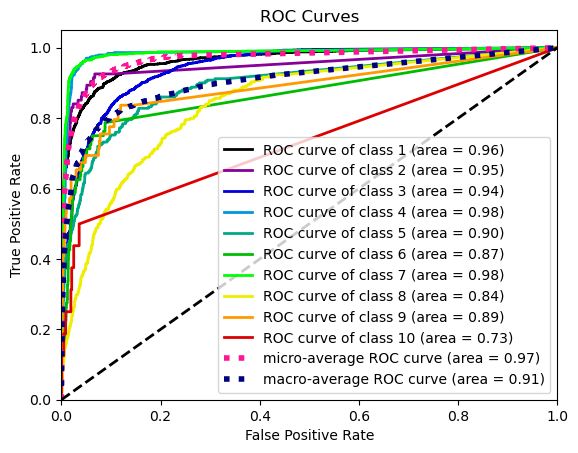

In [82]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
plot_roc(y_test, y_test_pred_proba)
plt.savefig('roc_curves_titleType.png', dpi=300, bbox_inches='tight')
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score

if len(np.unique(y_validation)) == 2:

    y_test_pred_proba_class1 = y_test_pred_proba[:, 1]
    auc_score = roc_auc_score(y_test, y_test_pred_proba_class1)
else:
    # Classificazione multiclasse!!!!
    auc_score = roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.9055813324237934


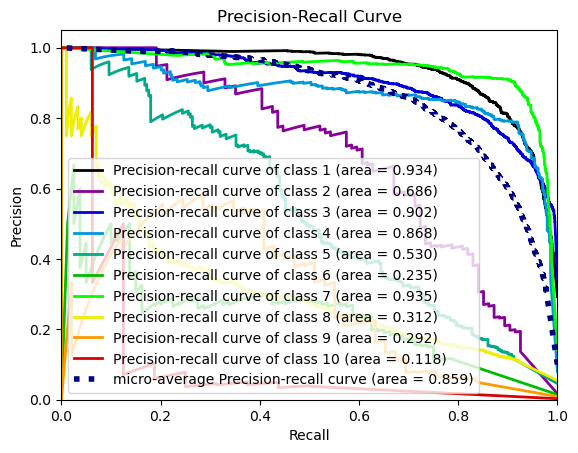

In [83]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.savefig('preicision_recall_titleType.png', dpi=300, bbox_inches='tight')
plt.show()

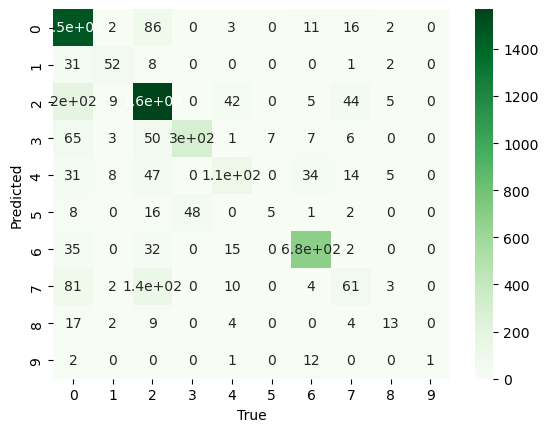

In [68]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [69]:
#Classificazione con parametri default
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [70]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([7, 3, 1, ..., 3, 4, 6])

In [71]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.91      0.83      1599
           2       0.59      0.49      0.53        94
           3       0.79      0.81      0.80      1870
           4       0.85      0.73      0.79       437
           5       0.53      0.43      0.47       250
           6       0.33      0.09      0.14        80
           7       0.90      0.84      0.87       766
           8       0.35      0.21      0.26       299
           9       0.34      0.27      0.30        49
          10       0.33      0.06      0.11        16

    accuracy                           0.76      5460
   macro avg       0.58      0.48      0.51      5460
weighted avg       0.75      0.76      0.75      5460



In [72]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0. , 0. , 0. , 0. , 0.4, 0. , 0.6, 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0. , 0. , 0.4, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ]])

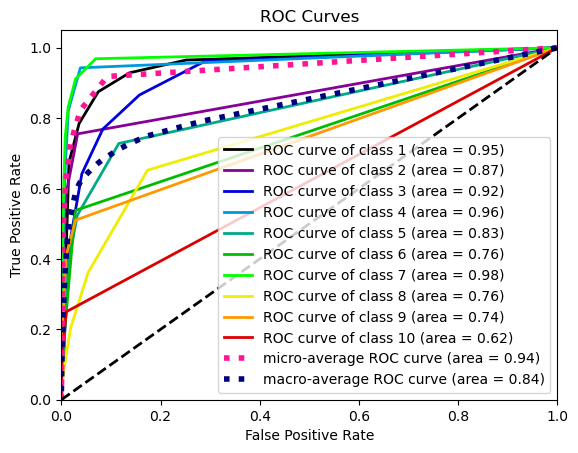

In [73]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
plot_roc(y_test, y_test_pred_proba)
#plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

if len(np.unique(y_validation)) == 2:

    y_test_pred_proba_class1 = y_test_pred_proba[:, 1]
    auc_score = roc_auc_score(y_test, y_test_pred_proba_class1)
else:
    # Classificazione multiclasse!!!!
    auc_score = roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

print(f"ROC AUC Score: {auc_score}")

ROC AUC Score: 0.8390063995260395


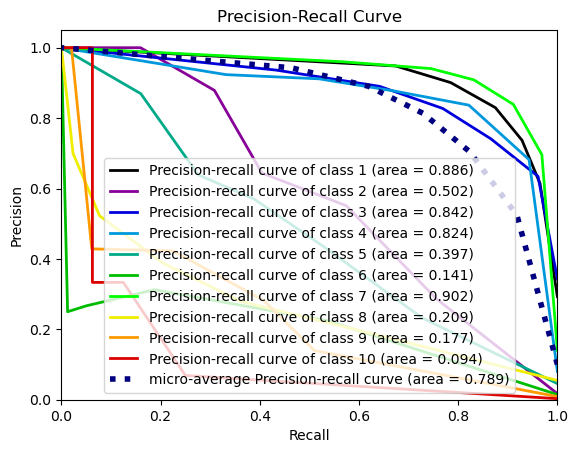

In [75]:
plot_precision_recall(y_test, y_test_pred_proba)
#plt.savefig('preicision_recall.png', dpi=300, bbox_inches='tight')
plt.show()

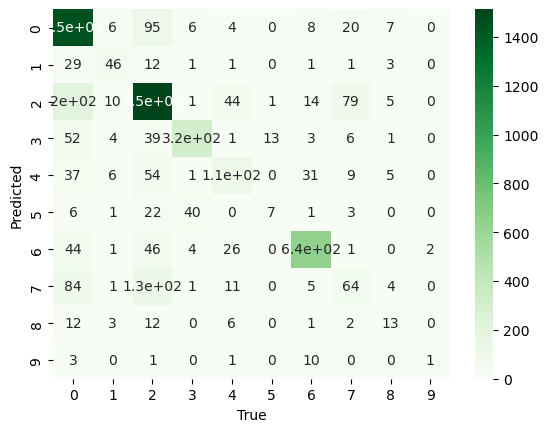

In [76]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()